<a href="https://colab.research.google.com/github/saikhairnar20023/-LGMVIP--DataScience/blob/main/EDA_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LetsGrowMore Virtual Internship Program (January-2023)
Intermediate Level Task 1

Name : Sai Shashank Khairnar

Task 1:Exploratory Data Analysis on Data- set- Terrorism

Import the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
terror_data = pd.read_csv('/terrorism.csv',encoding='latin1')
terror_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [8]:

terror_data.rename(columns={'iyear':'Year','imonth':'Month','iday':"Day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'Latitude',
    'longitude':'Longitude','summary':'Summary','attacktype1_txt':'attackType','targtype1_txt':'targetType','weaptype1_txt':'Weapon','nkill':'Kill',
     'nwound':'Wound'},inplace=True)
     

In [10]:
terror_data = terror_data[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude',"attackType",'Kill',
               'Wound','target1','Summary','Group','targetType','Weapon','motive']]
terror_data.head()
     

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,attackType,Kill,Wound,target1,Summary,Group,targetType,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [12]:
terror_data.shape
     

(11983, 18)

In [14]:
terror_data.isnull().sum()
     

Year              0
Month             0
Day               0
Country           0
State            43
Region            0
City              0
Latitude        390
Longitude       390
attackType        0
Kill           1540
Wound          2870
target1         118
Summary       11093
Group             1
targetType        0
Weapon            1
motive        11358
dtype: int64

In [16]:
terror_data['Wound'] = terror_data['Wound'].fillna(0)
terror_data['Kill'] = terror_data['Kill'].fillna(0)

Visualize the data

City with the most attacks


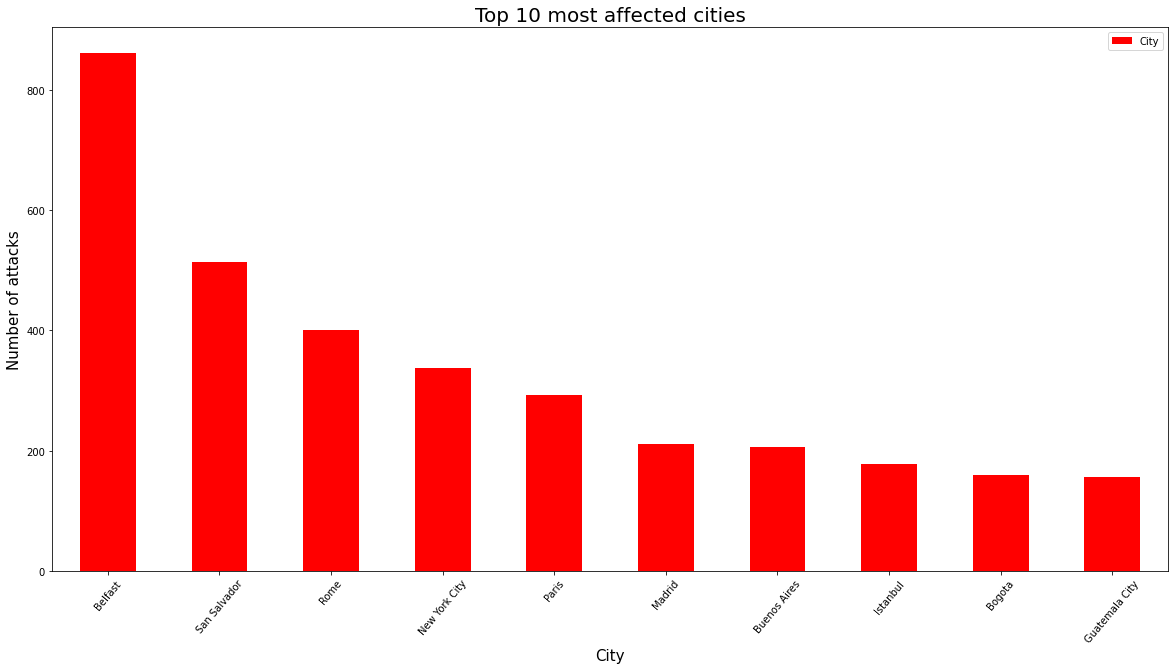

In [17]:
terror_data['City'].value_counts().to_frame().drop('Unknown').sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='red')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Top 10 most affected cities",fontsize=20)
plt.show()

Country with the most attacks

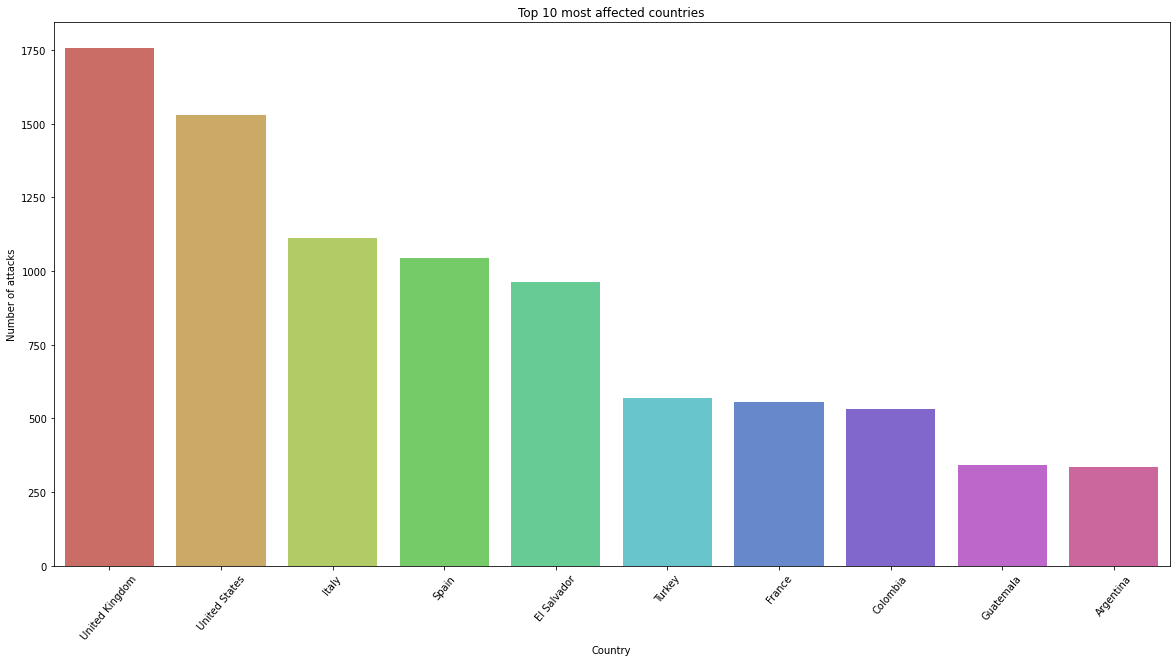

In [18]:
plt.subplots(figsize=(20,10))
sns.barplot(terror_data['Country'].value_counts()[:10].index,terror_data['Country'].value_counts()[:10].values,palette='hls')
plt.title('Top 10 most affected countries')
plt.xlabel('Country')
plt.ylabel('Number of attacks')
plt.xticks(rotation = 50)
plt.show()

Region with the most attacks

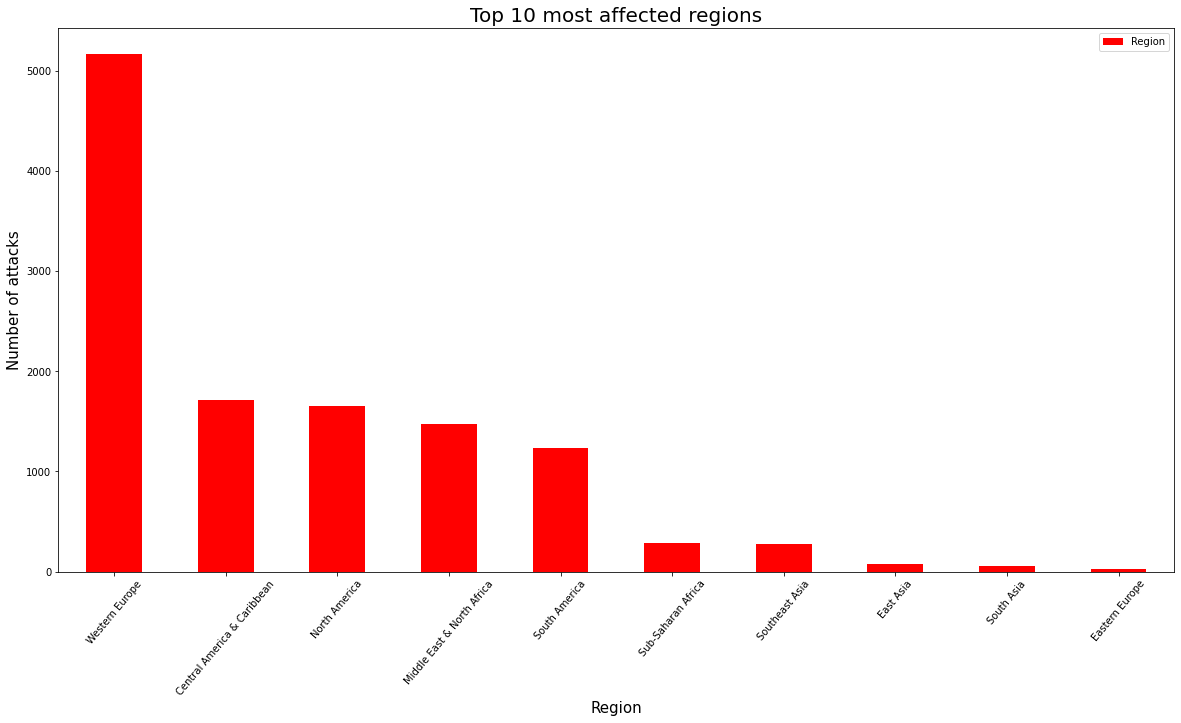

In [19]:
terror_data['Region'].value_counts().to_frame().sort_values('Region',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='red')
plt.xticks(rotation = 50)
plt.xlabel("Region",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Top 10 most affected regions",fontsize=20)
plt.show()
     

Group with the most attacks

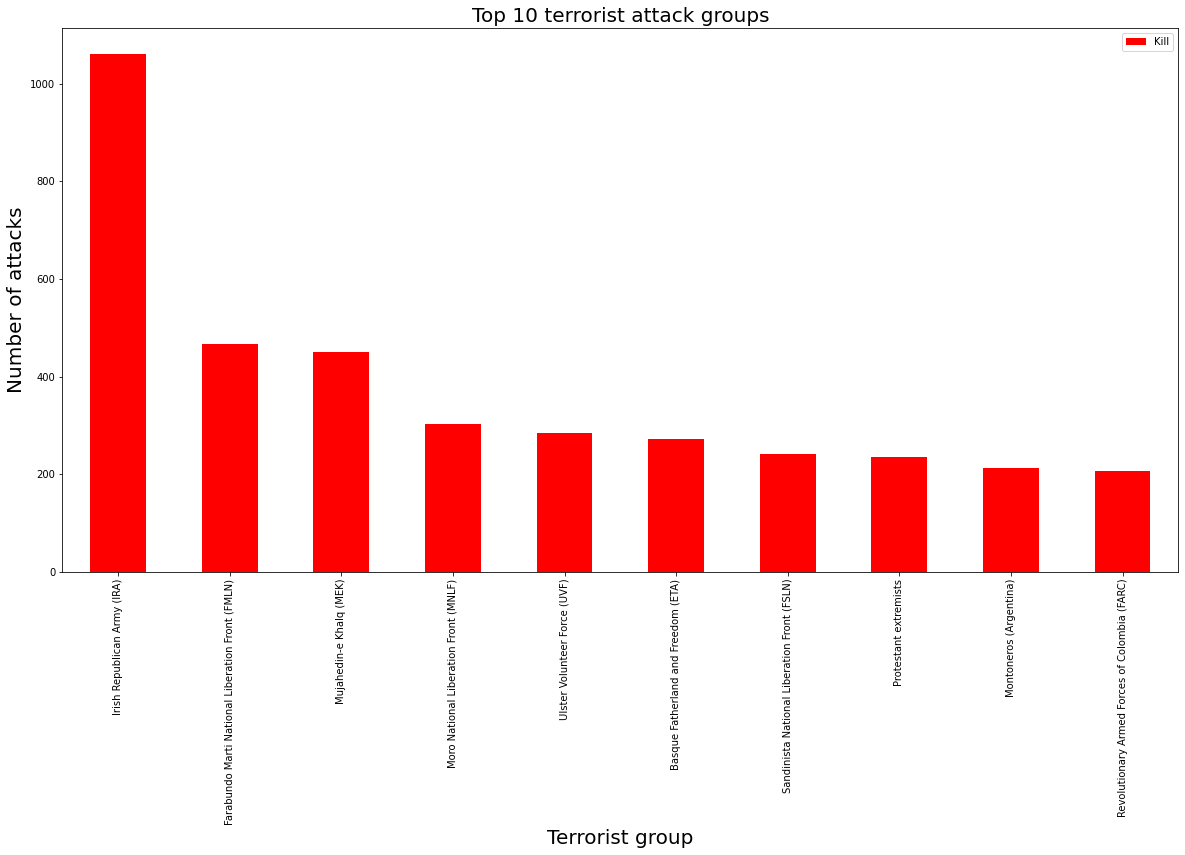

In [20]:
terror_data[['Group','Kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('Kill',ascending=False).head(10).plot(kind='bar',color='red',figsize=(20,10))
plt.title("Top 10 terrorist attack groups",fontsize=20)
plt.xlabel("Terrorist group",fontsize=20)
plt.ylabel("Number of attacks",fontsize=20)
plt.show()

Target types with most attacks

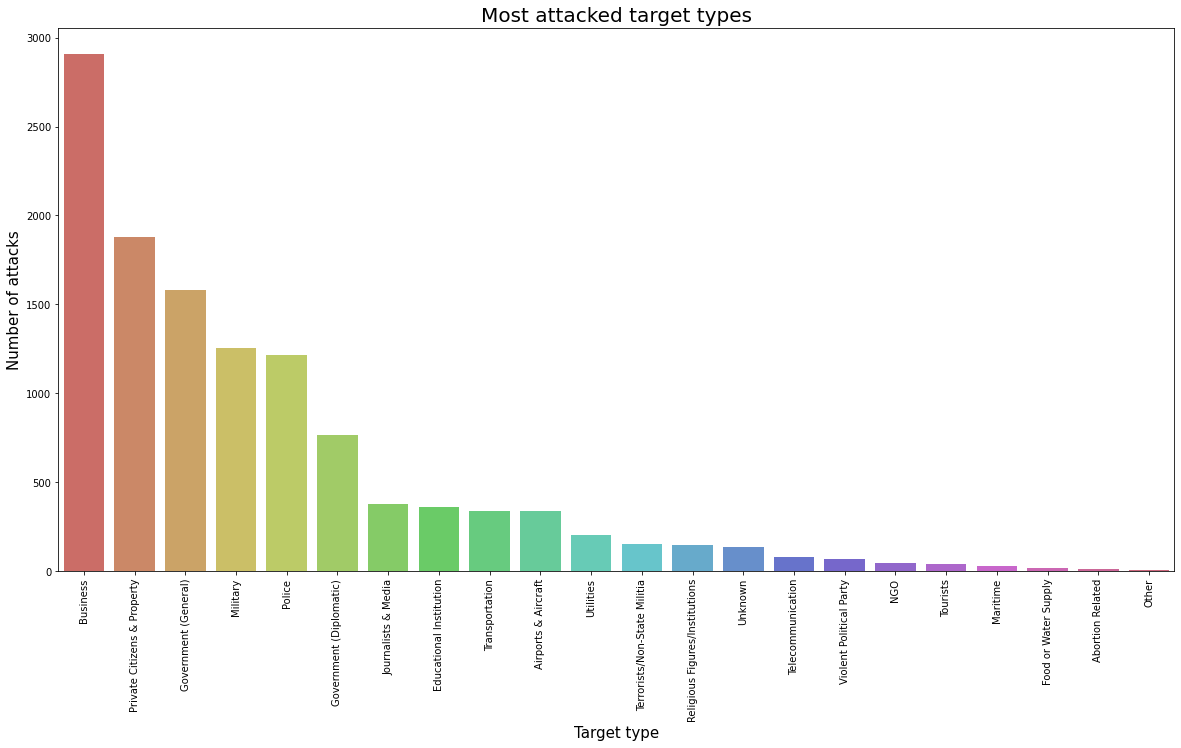

In [21]:
plt.subplots(figsize=(20,10))
sns.countplot(terror_data["targetType"],order=terror_data['targetType'].value_counts().index,palette="hls");
plt.xticks(rotation=90)
plt.xlabel("Target type",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Most attacked target types",fontsize=20)
plt.show()

Attack types with most attacks

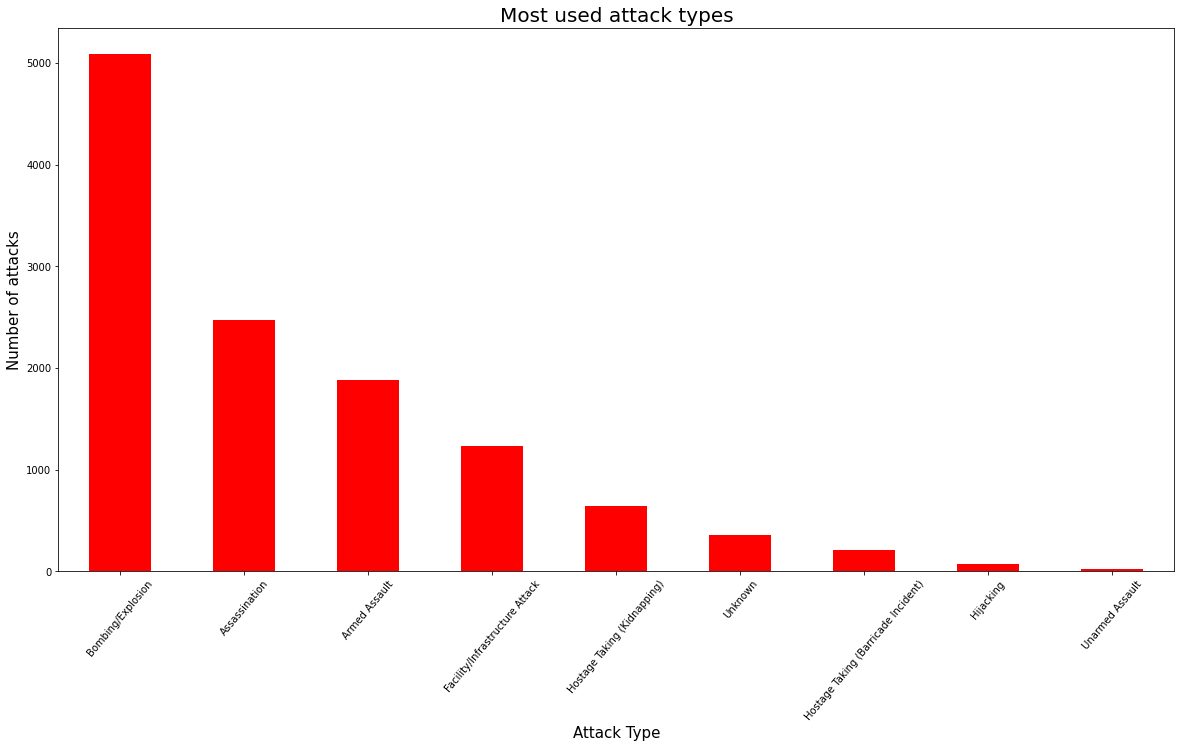

In [22]:
terror_data['attackType'].value_counts().plot(kind='bar',figsize=(20,10),color='red')
plt.xticks(rotation = 50)
plt.xlabel("Attack Type",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Most used attack types",fontsize=20)
plt.show()

Hot zone details

Most attacked city - Baghdad

Most attacked country - Iraq

Most attacked region - Middle East and North Africa

Terrorist group with most attacks - Islamic State of Iraq and the Levant (ISIL)

Most attacked target type - Private Citizens and Property

Most used attack type - Bombing/Explosion